Importing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Look at description and features of dataset

In [7]:
# read csv file
heart_df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
heart_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
# number of rows and columns
print(heart_df.shape)

(1190, 12)


In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**DATA VISUALIZATION**

In [10]:
# create class column that has target character values
int_char = {0: "Normal", 1:"Deceased"}
heart_df['class'] = heart_df['target'].map(int_char)
heart_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,class
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Normal
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Deceased
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Normal
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Deceased
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Normal


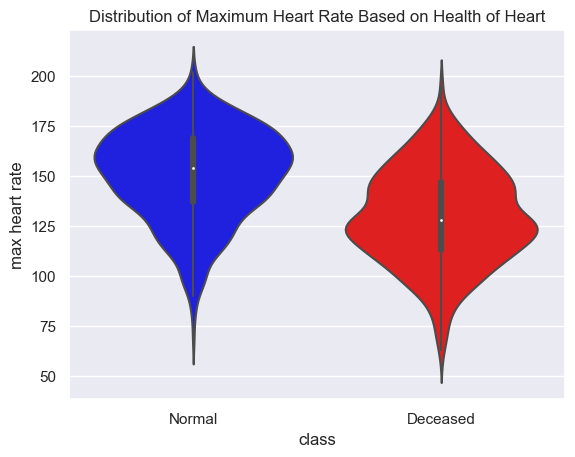

In [11]:
sns.set_theme(style="darkgrid")
# Distribution of serum cholesterol based on case of heart disease
sns.violinplot(x="class", y="max heart rate", data=heart_df, palette={'Normal': 'blue', 'Deceased': 'red'})
plt.title("Distribution of Maximum Heart Rate Based on Health of Heart")
plt.show()

Count of cases of heart disease across different age

In [12]:
# desriptive statistics of age column
print(heart_df['age'].describe())

count    1190.000000
mean       53.720168
std         9.358203
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: age, dtype: float64


In [13]:
# ngroup age into 5s and count based on class column
gp_data = heart_df.groupby(pd.cut(heart_df['age'], bins=range(25, 80, 5)))['class'].value_counts().unstack()
print(gp_data)

class     Deceased  Normal
age                       
(25, 30]         0       6
(30, 35]        12      20
(35, 40]        26      44
(40, 45]        36     108
(45, 50]        77      74
(50, 55]       114     134
(55, 60]       164      82
(60, 65]       129      52
(65, 70]        54      28
(70, 75]        13      11


C:\Users\myatt\AppData\Local\Temp\ipykernel_12128\1255929006.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp_data = heart_df.groupby(pd.cut(heart_df['age'], bins=range(25, 80, 5)))['class'].value_counts().unstack()


In [14]:
gp_data = gp_data.reset_index()

gp_data.columns = ['age_group', 'Heart Disease', 'Normal']
gp_data['age_group'] = gp_data['age_group'].astype(str)
gp_data.head()

,age_group,Heart Disease,Normal
0,"(25, 30]",0,6
1,"(30, 35]",12,20
2,"(35, 40]",26,44
3,"(40, 45]",36,108
4,"(45, 50]",77,74


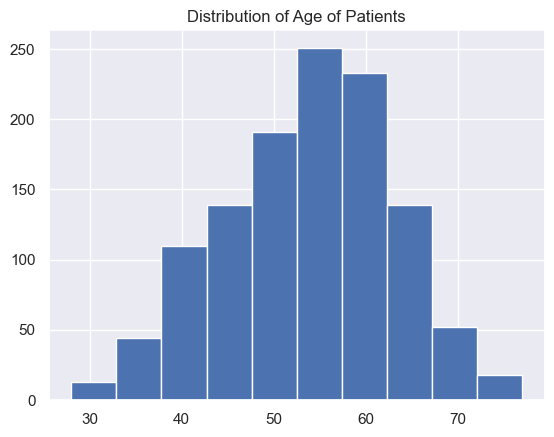

In [15]:
# distribution of age column
heart_df["age"].hist()
plt.title("Distribution of Age of Patients")
plt.show()

C:\Users\myatt\AppData\Local\Temp\ipykernel_12128\3378177833.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age_group', y='Normal', palette='blue', marker='o', data=gp_data)
C:\Users\myatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\myatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\myatt\AppData\Local\Temp\ipykernel_12128\3378177833.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age_group', y='Heart Disease', palette='red', marker='o', data=gp_data)
C:\Use

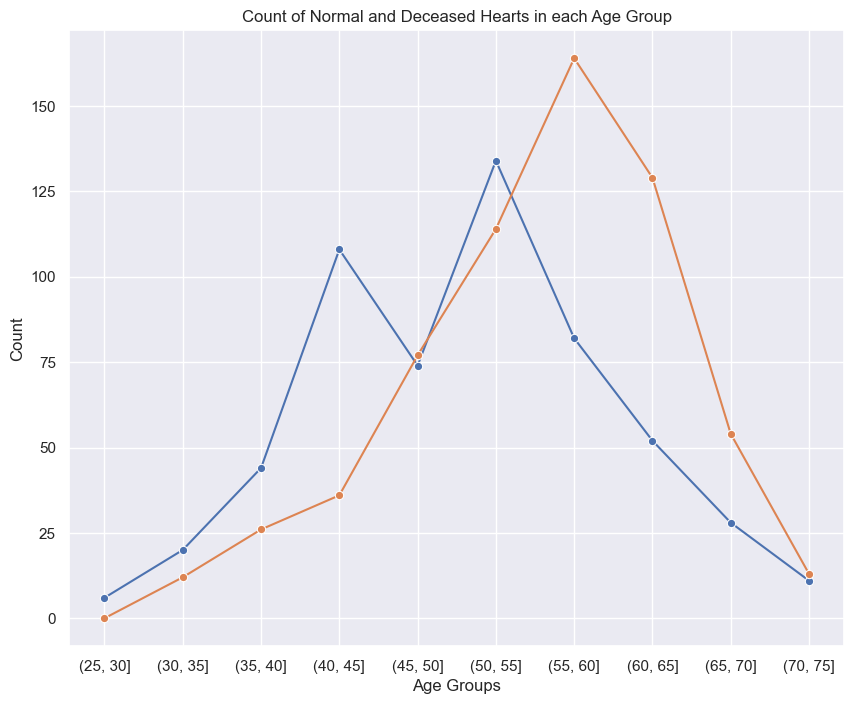

In [16]:
# plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='age_group', y='Normal', palette='blue', marker='o', data=gp_data)
sns.lineplot(x='age_group', y='Heart Disease', palette='red', marker='o', data=gp_data)
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title("Count of Normal and Deceased Hearts in each Age Group")
plt.show()

In [17]:
chestie = {1:'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'}
heart_df['chest'] = heart_df['chest pain type'].map(chestie)
heart_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,class,chest
0,40,1,2,140,289,0,0,172,0,0.0,1,0,Normal,atypical angina
1,49,0,3,160,180,0,0,156,0,1.0,2,1,Deceased,non-anginal pain
2,37,1,2,130,283,0,1,98,0,0.0,1,0,Normal,atypical angina
3,48,0,4,138,214,0,0,108,1,1.5,2,1,Deceased,asymptomatic
4,54,1,3,150,195,0,0,122,0,0.0,1,0,Normal,non-anginal pain


In [18]:
heart_df.groupby(['chest', 'class']).size().reset_index(name='count')

,chest,class,count
0,asymptomatic,Deceased,483
1,asymptomatic,Normal,142
2,atypical angina,Deceased,31
3,atypical angina,Normal,185
4,non-anginal pain,Deceased,90
5,non-anginal pain,Normal,193
6,typical angina,Deceased,25
7,typical angina,Normal,41


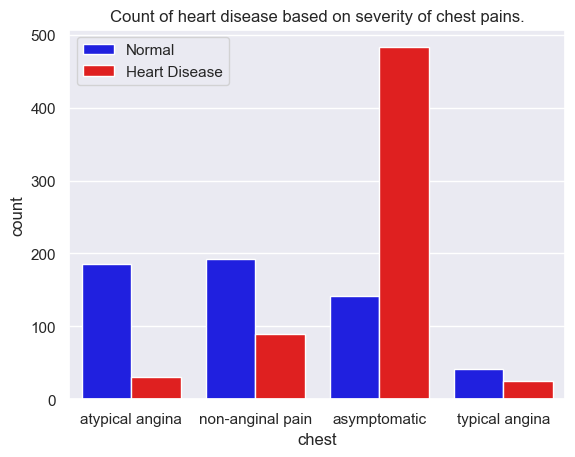

In [19]:
clrs = ['blue', 'red']
sns.countplot(data= heart_df, x= "chest", hue="class", palette = clrs).set_title("Count of heart disease based on severity of chest pains.")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

Separate features from labels

In [20]:
feat = heart_df.drop(["target", "class", "chest"], axis=1)
feat.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [21]:
X = feat.values
y = heart_df['target'].values

In [22]:
print(y[1:10])

[1 0 1 0 0 0 0 1 0]


Splitting the Dataset into Training and Test Sets



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 8)

In [24]:
print(X_train[1:10])

[[ 62.    1.    4.  150.    0.    1.    1.   78.    0.    2.    2. ]
 [ 58.    0.    4.  100.  248.    0.    2.  122.    0.    1.    2. ]
 [ 53.    1.    4.  123.  282.    0.    0.   95.    1.    2.    2. ]
 [ 59.    1.    3.  180.  213.    0.    0.  100.    0.    0.    1. ]
 [ 57.    1.    2.  140.  265.    0.    1.  145.    1.    1.    2. ]
 [ 63.    1.    3.  130.    0.    0.    1.  111.    1.    0.    2. ]
 [ 52.    1.    4.  135.    0.    1.    0.  128.    1.    2.    2. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2. ]
 [ 60.    1.    4.  145.  282.    0.    2.  142.    1.    2.8   2. ]]


**Standardization**

To ensure all feastures are on the same scale

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm


# KNeighbors Classfier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

# Naive Bayes classifier


gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#Below we are experimenting with various SVMs and different parameters
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo',probability=True).fit(X_train, y_train.ravel())

In [27]:
# lbraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**5 fold Cross Validation**

KNN

In [28]:
kf = KFold(n_splits=5)

# K Nearest Neighbor
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8162470240242407


GNB

In [29]:
kf = KFold(n_splits=5)

# Gaussian Naive Bayes
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8211023735661207


Linear SVM

In [30]:
kf = KFold(n_splits=5)

# Linear Support Vector Machine
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7994805569583724


Sigmoid SVM

In [31]:
kf = KFold(n_splits=5)

# Sigmoid Support Vector Machine
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.765897121419811


Poly SVM

In [32]:
kf = KFold(n_splits=5)

# Sigmoid Support Vector Machine
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.822249476949715


Decision Tree

In [33]:
kf = KFold(n_splits=5)

# Sigmoid Support Vector Machine
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8511362816535604


Random Forest Classification

In [34]:
kf = KFold(n_splits=5)

# Sigmoid Support Vector Machine
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8931606666185701


**PREDICTION AND CLASSIFICATION REPORT**

In [35]:
# LIBRARIES
from sklearn.metrics import classification_report

K Nearest Neighbor

In [36]:
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       169
           1       0.88      0.92      0.90       188

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.89      0.89      0.89       357



Gaussian Naive Bayes

In [37]:
pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       169
           1       0.91      0.86      0.89       188

    accuracy                           0.88       357
   macro avg       0.88      0.88      0.88       357
weighted avg       0.88      0.88      0.88       357



Linear Support Vector Machine

In [38]:
pred_linear = linear.predict(X_test)
print(classification_report(y_test, pred_linear))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       169
           1       0.87      0.87      0.87       188

    accuracy                           0.86       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.86      0.86      0.86       357



Polynomial Support Vector Machine

In [39]:
pred_poly = poly.predict(X_test)
print(classification_report(y_test, pred_poly))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       169
           1       0.90      0.90      0.90       188

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



Sigmoid Support Vector Machine

In [40]:
pred_sig = sig.predict(X_test)
print(classification_report(y_test, pred_sig))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       169
           1       0.81      0.83      0.82       188

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357



Decision Tree Classification

In [41]:
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       169
           1       0.89      0.89      0.89       188

    accuracy                           0.89       357
   macro avg       0.88      0.88      0.88       357
weighted avg       0.89      0.89      0.89       357



Random Forest Classification

In [42]:
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       169
           1       0.92      0.95      0.94       188

    accuracy                           0.93       357
   macro avg       0.93      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357



Classification Report

In [43]:

metrics = ['Precision', 'Recall', 'F1', 'Accuracy', 'Precision', 'Recall', 'F1', 'Accuracy', 'Precision', 'Recall', 'F1', 'Accuracy',
               'Precision', 'Recall', 'F1', 'Accuracy', 'Precision', 'Recall', 'F1', 'Accuracy', 'Precision', 'Recall', 'F1', 'Accuracy',
               'Precision', 'Recall', 'F1', 'Accuracy']
model = ['KNN', 'KNN', 'KNN', 'KNN', 'GNB', 'GNB', 'GNB', 'GNB', 'Linear SVM', 'Linear SVM', 'Linear SVM', 'Linear SVM',
             'Poly SVM', 'Poly SVM', 'Poly SVM', 'Poly SVM', 'Sigmoid SVM', 'Sigmoid SVM', 'Sigmoid SVM', 'Sigmoid SVM', 'Decision Tree',
             'Decision Tree', 'Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest']
weighted_avg = [0.89, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88, 0.88, 0.86, 0.86, 0.86, 0.86, 0.90, 0.90, 0.90, 0.90,
                   0.81, 0.81, 0.81, 0.81, 0.88, 0.88, 0.88, 0.88, 0.92, 0.92, 0.92, 0.92]

cr_dict = {'metrics': metrics, 'model': model, 'weighted_avg': weighted_avg}
cr_df = pd.DataFrame(cr_dict)
cr_df

,metrics,model,weighted_avg
0,Precision,KNN,0.89
1,Recall,KNN,0.89
2,F1,KNN,0.89
3,Accuracy,KNN,0.89
4,Precision,GNB,0.88
5,Recall,GNB,0.88
6,F1,GNB,0.88
7,Accuracy,GNB,0.88
8,Precision,Linear SVM,0.86
9,Recall,Linear SVM,0.86


<Figure size 1000x800 with 0 Axes>

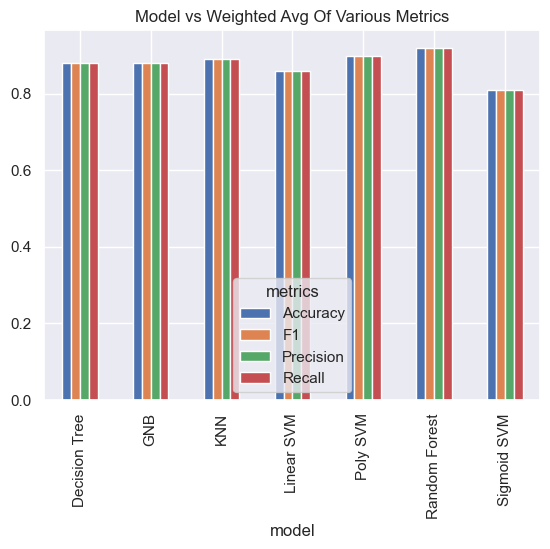

In [44]:
plt.figure(figsize=(10,8))
# Pivot the data to have 'Product' as columns and 'Segment' as the index
pivot_df = cr_df.pivot(index='model',
                    columns='metrics',
                    values='weighted_avg')

# Create a grouped barplot
pivot_df.plot.bar(grid=True)
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
import pickle

# Assuming X_train and y_train are defined
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model using pickle
with open('heart_disease_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [46]:
#Source code: #for the reference 
    https://www.youtube.com/watch?v=XmSlFPDjKdc&t=400s
    https://www.youtube.com/watch?v=xG-E--Ak5jg&t=1552s
    https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/
    https://blog.quantinsti.com/machine-learning-classification-strategy-python/
#I used chatgpt to debug most of the code. 

IndentationError: unexpected indent (2598296663.py, line 2)